In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Q1: Coin toss

Read section 2.1 of Sivia and recreate figure 2.3.

## (a)

Define the prior functions

In [11]:
def uniform_prior(H):
    if  H > 1 or H < 0:
        return 0
    
    return 1
    
first_prior = np.vectorize(uniform_prior)
    

def gaussian_prior(H):
    if  H > 1 or H < 0:
        return 0
    
    
    sigma = 0.03
    mu = 0.5
    
    return np.exp(-(((H - mu)/sigma)**2)/2) / (sigma * (2 * np.pi) ** 0.5)

second_prior = np.vectorize(gaussian_prior)


def custom_prior(H):
    if  H > 1 or H < 0:
        return 0

    a = 25
    A = 1 / 0.08923348886697419
    return A * np.exp(a*H*(H-1))

third_prior = np.vectorize(custom_prior)

### Bonus point

Why do we need to use np.vectorize here?

np.vectorize can be used to run a function on every elements of an array, since for loops in python is not highly efficient.
Its functionality is similar to "map" built-in function.

## (b)

Create an array for H, calculte the priors, normalize them and then plot them.

In [2]:
H = np.linspace(0, 1, 1000, dtype=np.float128)

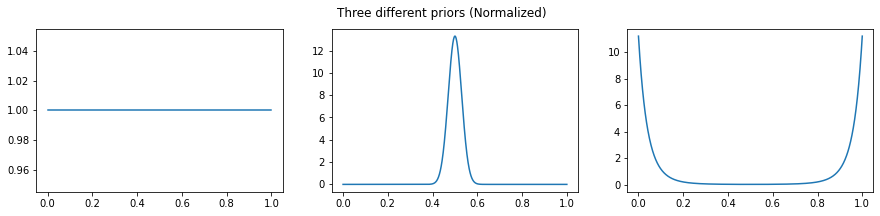

In [10]:
plt.figure(figsize=(15, 3))
plt.suptitle('Three different priors (Normalized)')

plt.subplot(1, 3, 1)
plt.plot(H, first_prior(H))

plt.subplot(1, 3, 2)
plt.plot(H, second_prior(H))

plt.subplot(1, 3, 3)
plt.plot(H, third_prior(H))

plt.show()

## (c)

Here we explicitly declared a data type for the array H. Although most of the times python does it for us, here was an example that we need to do it by hand to avoid round-off error. Find out what this error is and write a few lines about it (In Farsi or English) and explain what did we do to avoid it here. In other words, why did we use 'np.float128' exept just using 'float'?

You can also emit the data type decleration from the definition of H and see what happens in calculating the posterior.

## (d)

Write a proper function to calculate the psterior for a given data and recreate the given plot.

In [98]:
data = [np.random.choice([0, 1], p=(0.7, 0.3), size=(i)) for i in range(4)]  
data.extend([np.random.choice([0, 1], p=(0.7, 0.3), size=(2**i)) for i in range(2, 13)])

In [102]:
def posterior(H, data, prior):
    ones = np.count_nonzero(data == 1)
    zeros = np.count_nonzero(data == 0)
    
    likelihood = H**ones * (1 - H)**zeros
    
    return likelihood * prior(H)

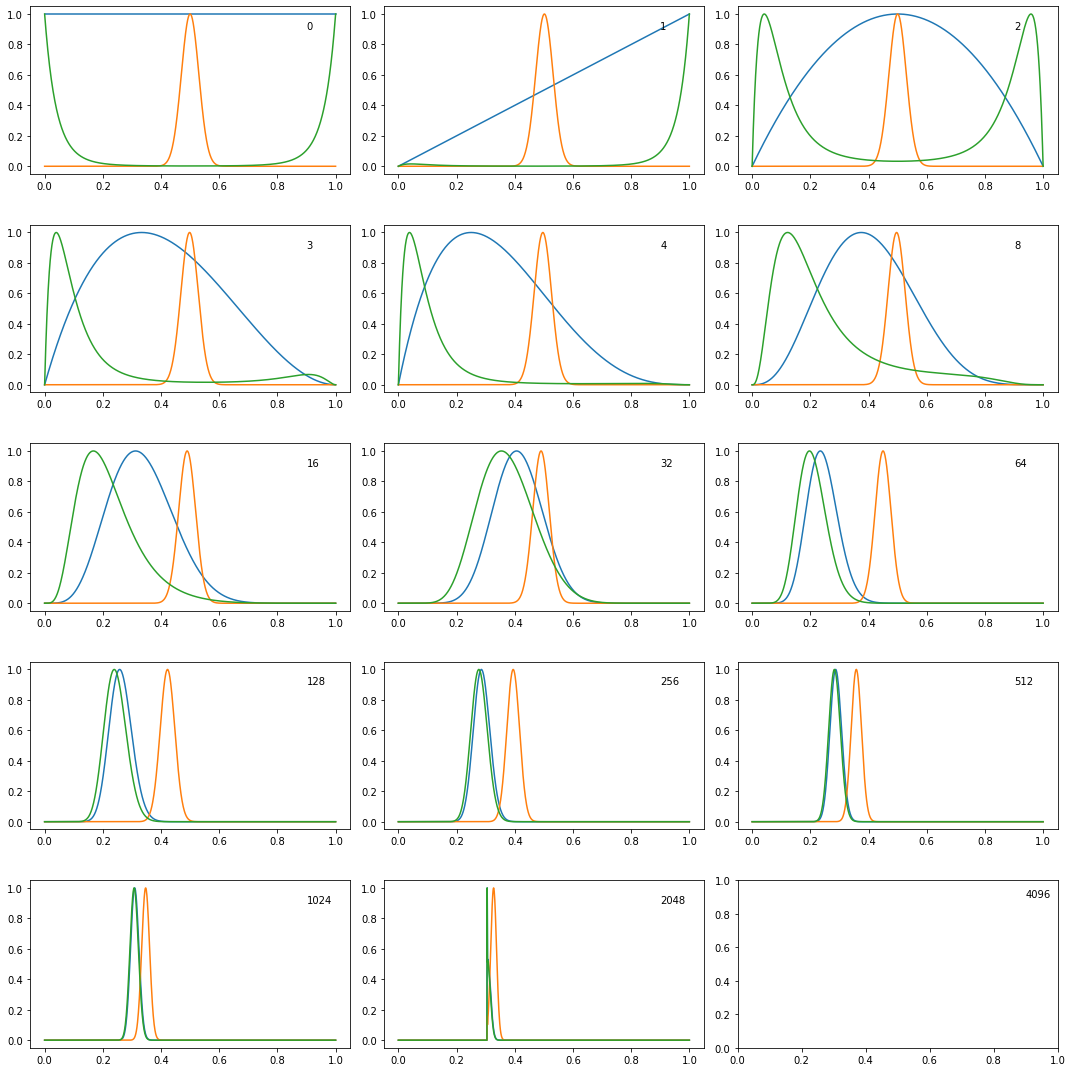

In [103]:
plt.figure(figsize=(15, 15))

for i in range(15):
    plt.subplot(5, 3, i + 1)
    first_posterior = posterior(H, data[i], first_prior)
    second_posterior = posterior(H, data[i], second_prior)
    third_posterior = posterior(H, data[i], third_prior)
    for post in (first_posterior, second_posterior, third_posterior):
        max_value = np.max(post)
        if max_value != 0:
            plt.plot(H, post / max_value)
    plt.text(0.9, 0.9, len(data[i]))
    
    
plt.tight_layout(h_pad=3)
plt.show()

# Q2: Distributions and moments

## (a)

Write a function to calculate raw moments of a given distribution 

In [22]:
def rawMoment(array, n):
    return np.mean(array ** n)

## (b)

Write a function to calculate central moments of a given distribution

In [42]:
def centralMoment(array, n):
    mean = np.mean(array)
    return np.mean((array - mean) ** n)

## (c)

Using numpy.random, create a binomial (p=0.7, n=$30$), a Poisson ($\mu$ = 2.1) and a gaussian ($\mu$ = 2.1, $\sigma = 0.3$) distribution with size $10^6$ and calculate their first 3 raw and central moments

In [52]:
def printMoments(array):
    print("First Raw Moment:", rawMoment(array, 1))
    print("Second Raw Moment:", rawMoment(array, 2))
    print("Third Raw Moment:", rawMoment(array, 3))
    print("First Central Moment:", centralMoment(array, 1))
    print("Second Central Moment:", centralMoment(array, 2))
    print("Third Central Moment:", centralMoment(array, 3))

In [53]:
binomial = np.random.binomial(30, 0.7, size=1000000)
print("Binomial: ")
printMoments(binomial)

Binomial: 
First Raw Moment: 21.000217
Second Raw Moment: 447.327999
Third Raw Moment: 9656.878927
First Central Moment: 7.54425855120644e-16
Second Central Moment: 6.318884952910999
Third Central Moment: -2.502032594114552


In [54]:
poisson = np.random.poisson(2.1, size=1000000)
print("Piosson: ")
printMoments(poisson)

Piosson: 
First Raw Moment: 2.097366
Second Raw Moment: 6.495926
Third Raw Moment: 24.512424
First Central Moment: -9.557865610076988e-17
Second Central Moment: 2.0969818620439997
Third Central Moment: 2.091812748948447


In [55]:
gaussian = np.random.normal(2.1, 0.3, size=1000000)
print("Gaussian: ")
printMoments(gaussian)

Gaussian: 
First Raw Moment: 2.1000537239205896
Second Raw Moment: 4.500328470162243
Third Raw Moment: 9.829392173077315
First Central Moment: 3.4934455328539114e-16
Second Central Moment: 0.0901028268095073
Third Central Moment: 1.9056493088925724e-05


## (d)

Using scipy.stats, calculate the first three moments of these distributions and check with the results from your own function. What does the function in scipy calculate? Raw moments or central moments?

In [2]:
import scipy as sp

In [48]:
def printScipyMoments(array):
    print("First Moment:", sp.stats.moment(array, 1))
    print("Second Moment:", sp.stats.moment(array, 2))
    print("Third Moment:", sp.stats.moment(array, 3))

In [56]:
print("Binomial")
printScipyMoments(binomial)

Binomial
First Moment: 0.0
Second Moment: 6.318884952910999
Third Moment: -2.5020325941145503


In [57]:
print("Poisson")
printScipyMoments(poisson)

Poisson
First Moment: 0.0
Second Moment: 2.0969818620439997
Third Moment: 2.091812748948447


In [58]:
print("Gaussian")
printScipyMoments(gaussian)

Gaussian
First Moment: 0.0
Second Moment: 0.0901028268095073
Third Moment: 1.9056493088925663e-05


It's now evident that scipy calculates central moments.

# Q3: Radioactive decay

The Poisson distribution is often used to describe situations in which an event occurs repeatedly at a constant rate of probability. An application of this distribution involves the decay of radioactive samples, but only in the approximation that the decay rate is slow enough that depletion in the population of the decaying species can be neglected.

Now suppose we have a data set showing the number of $\alpha$ particles emmited in 7.5 sec intervals:

## (a)

Load the provided data into a pandas data frame and show the data and then plot it's PDF.

In [3]:
import pandas as pd

In [4]:
data = pd.read_csv("data.txt", sep = "\t")
data

,# time passed,number of events
0,7.5,232.0
1,15.0,240.0
2,22.5,245.0
3,30.0,226.0
4,37.5,223.0
...,...,...
2043,15330.0,265.0
2044,15337.5,220.0
2045,15345.0,252.0
2046,15352.5,229.0


## (b)

Calculate total number of decays and the average number of decays after each time interval. Then add the data to the Pandas DataFrame and show it. Then save the data to file 'new_data.txt'.

In [5]:
newData = data.copy()
newData["interval average"]= data["number of events"] / 7.5
newData["total"] = newData["number of events"].rolling(len(newData), min_periods=1).sum()
newData

,# time passed,number of events,interval average,total
0,7.5,232.0,30.933333,232.0
1,15.0,240.0,32.000000,472.0
2,22.5,245.0,32.666667,717.0
3,30.0,226.0,30.133333,943.0
4,37.5,223.0,29.733333,1166.0
...,...,...,...,...
2043,15330.0,265.0,35.333333,484278.0
2044,15337.5,220.0,29.333333,484498.0
2045,15345.0,252.0,33.600000,484750.0
2046,15352.5,229.0,30.533333,484979.0


In [6]:
newData.to_csv("new_data.txt", index=None, sep="\t")

## (c)

Use a unifor prior and do the same analysis as question 1 to get the mean decay number per interval. Plot the diagrams as well. (Beware that this time we have a Poisson distribution rather than a binomial one)

In [42]:
def uni_prior(H):
    return 1
uniform_prior = np.vectorize(uni_prior)

def posterior(mu, args):
    events = args["data"]
    prior = args["prior"]
    if events.size != 0:
        k = int(events.sum() / events.size / 7.5)
        return prior(mu) * mu**k * np.exp(-mu) / np.math.factorial(k)
    return prior(mu)

posterior = np.vectorize(posterior)

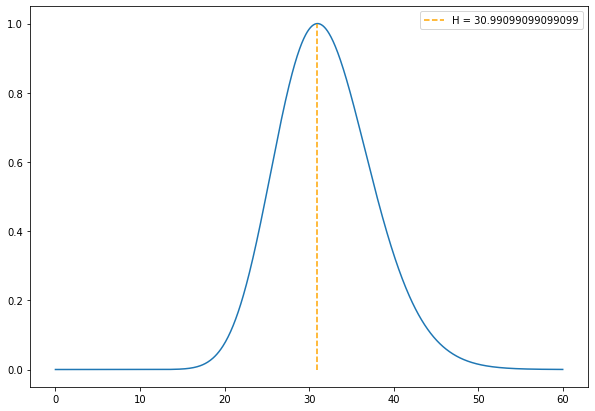

In [22]:
H = np.linspace(0, 60, 1000)
plt.figure(figsize=(10, 7))
# posts = np.array([posterior(h, newData["number of events"], uniform_prior) for h in H])
posts = posterior(H, {"data" : newData["number of events"], "prior" : uniform_prior})
max_value = np.max(posts)
if max_value != 0 :
    plt.plot(H, posts / max_value)
    x_max = H[np.argmax(posts)]
    plt.vlines(x_max, ymin = 0, ymax = 1, colors="orange", label=f"H = {x_max}", linestyles="--")
    plt.legend(loc="upper right")
plt.show()

## (d)

Use two different priors of your choise and repeat the analysis. Which of these three priors leads to an answer sooner?

In [69]:
def gaussian_prior(H):
    sigma = 5
    mu = 10
    
    return np.exp(-(((H - mu)/sigma)**2)/2) / (sigma * (2 * np.pi) ** 0.5)

def custom_prior(H):
    H = H / 60
    a = 25
    A = 1 / 0.08923348886697419
    return A * np.exp(a*H*(H-1))


In [53]:
sets = [newData["number of events"][:i] for i in (0, 1, 2, 3, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048)]

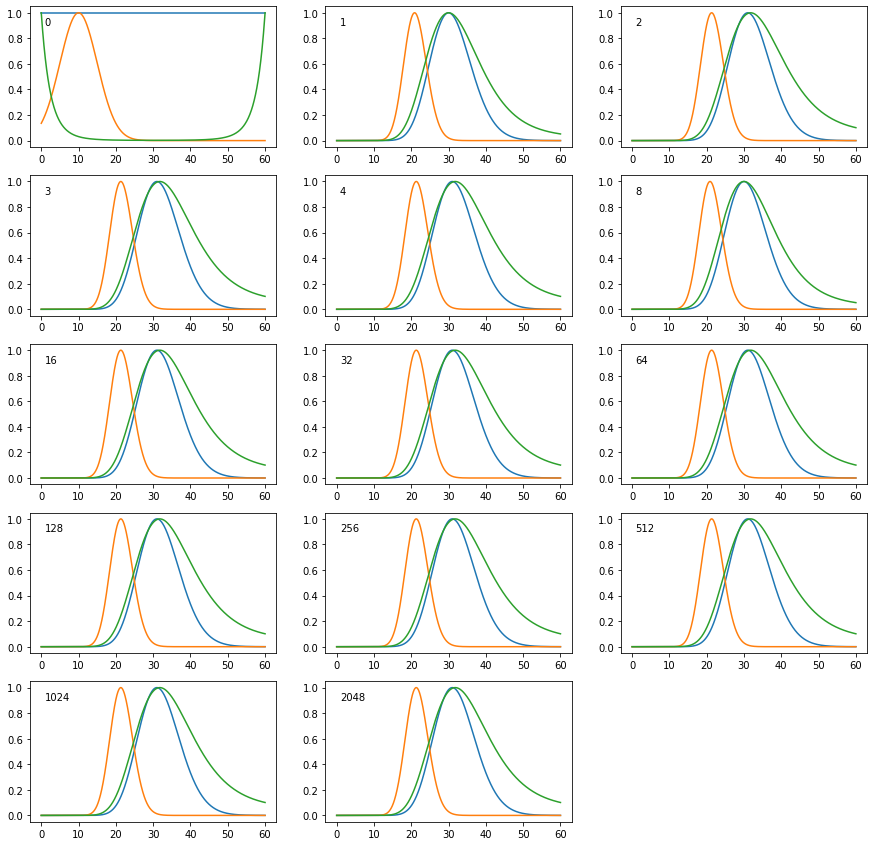

In [70]:
plt.figure(figsize=(15, 15))
for i in range(len(sets)):
    plt.subplot(5, 3, i + 1)
    uni_posterior = posterior(H, {"data": sets[i], "prior": uniform_prior})
    gaussian_posterior = posterior(H, {"data": sets[i], "prior": gaussian_prior})
    custom_posterior = posterior(H, {"data": sets[i], "prior": custom_prior})
    for post in (uni_posterior, gaussian_posterior, custom_posterior):
        max_value = np.max(post)
        if max_value != 0:
            plt.plot(H, post / max_value)
    plt.text(0.9, 0.9, len(sets[i]))
plt.show()

## (e)

Now that you have the average decay per time interval, calculate the half life of this radioactive element (Suppose that the sample is large enough not to lose a noticable fraction of the particles in the span of the experiment). Can find out what this element is?

# Bonus question

Do an error analysis and report how sure are you about the number you derived for the half life of the element.